In [56]:
import pandas as pd
import torch

In [57]:
df = pd.read_csv('거문도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22103,2013-01-01,6.8,1020.6,61.0,6.2,13.9,2.1,1.4,2.1,3.2,5.5,7.1
1,22103,2013-01-02,9.6,1026.8,58.0,4.2,13.8,2.3,1.5,2.0,3.0,4.5,6.4
2,22103,2013-01-03,NaN,1034.6,59.0,-1.6,13.1,NaN,NaN,1.9,2.8,NaN,4.9
3,22103,2013-01-04,5.2,1029.4,47.0,-0.4,11.8,1.5,0.9,1.5,2.4,4.3,5.8
4,22103,2013-01-05,7.3,1024.8,54.0,1.5,11.3,1.4,1.0,1.5,2.2,3.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,22103,2022-12-27,8.4,1027.4,60.0,6.0,12.3,1.3,0.9,1.2,1.7,3.6,4.0
3644,22103,2022-12-28,8.8,1029.6,61.0,6.1,12.9,1.3,0.9,1.0,1.6,3.4,3.7
3645,22103,2022-12-29,8.1,1032.0,61.0,5.4,16.5,1.1,0.8,1.1,1.8,3.4,3.7
3646,22103,2022-12-30,7.4,1031.7,55.0,6.5,17.8,1.1,0.7,0.9,1.6,3.3,3.5


In [58]:
df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2013-01-01,1020.6,6.2,13.9
2013-01-02,1026.8,4.2,13.8
2013-01-03,1034.6,-1.6,13.1
2013-01-04,1029.4,-0.4,11.8
2013-01-05,1024.8,1.5,11.3
...,...,...,...
2022-12-27,1027.4,6.0,12.3
2022-12-28,1029.6,6.1,12.9
2022-12-29,1032.0,5.4,16.5


In [59]:
import numpy as np

df = df[['Stemp(°C)']]

df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan

df = df.dropna()
df

C:\Users\admin\AppData\Local\Temp\ipykernel_11752\2087265369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan


,Stemp(°C)
date,
2013-01-01,13.9
2013-01-02,13.8
2013-01-03,13.1
2013-01-04,11.8
2013-01-05,11.3
...,...
2022-12-27,12.3
2022-12-28,12.9
2022-12-29,16.5


c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


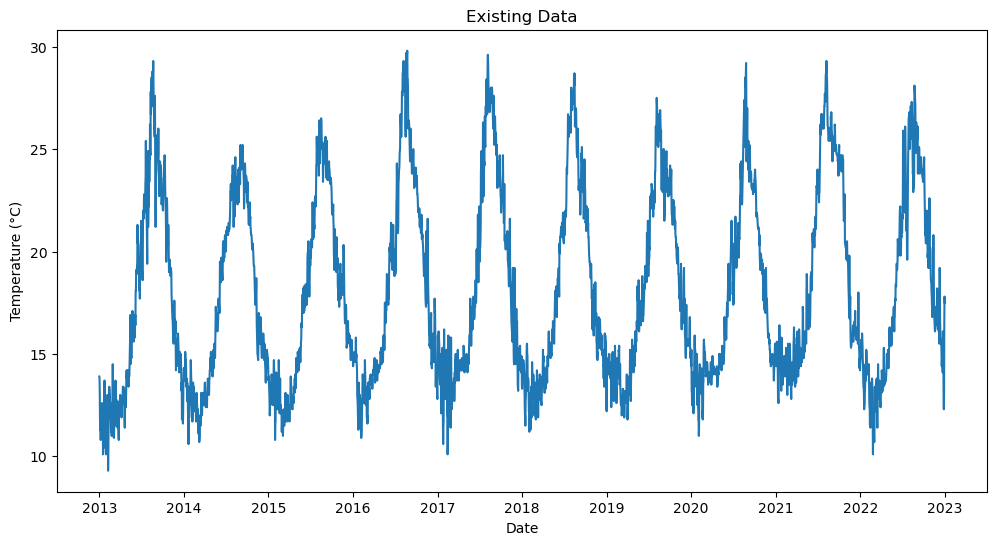

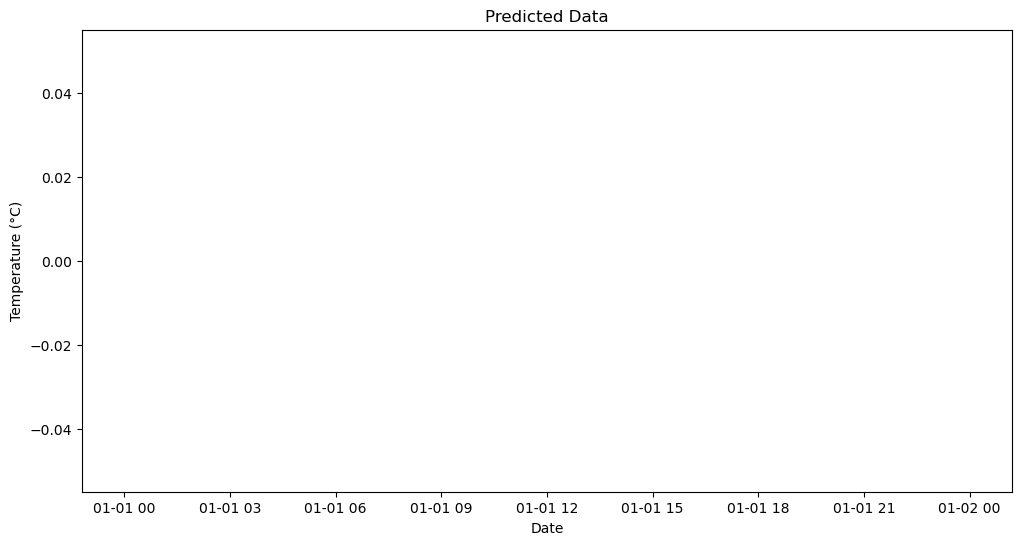

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is the DataFrame with the modified data
train_data = df.iloc[:2878]  # Selecting the first 2878 rows for training
test_data = df.iloc[2878:]   # Selecting the remaining data for testing/prediction

# Determine suitable values for p, d, and q based on your data analysis
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

# Fit the ARIMA model
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Predict the remaining data
predicted_values = model_fit.predict(start=len(train_data), end=len(df)-1)

# Combine the predicted values with the original DataFrame
predicted_df = pd.DataFrame(predicted_values, columns=['Predicted'], index=test_data.index)
combined_df = pd.concat([df, predicted_df], axis=1)

# Plot the existing data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Stemp(°C)'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Existing Data')
plt.show()

# Plot the predicted data
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Predicted'], color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Predicted Data')
plt.show()
